# for 6._gene_intersect

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib_venn import venn2
from matplotlib_venn.layout.venn2 import DefaultLayoutAlgorithm

folderPath = 'survival_results/'
resultPath = 'intersection_results/'

# 0. Define functions

In [2]:
def plot_venn2(set1, set2, set1_label, set2_label):
    plt.figure(figsize=(5,5))

    out = venn2(
        (set1, set2),
        (set1_label, set2_label),
        layout_algorithm=DefaultLayoutAlgorithm(fixed_subset_sizes=(1, 1, 1))
    )
    
    # set texts
    for text in out.set_labels:
        if text:
            text.set_fontsize(14)
    for text in out.subset_labels:
        if text:
            text.set_fontsize(14)
            text.set_path_effects([
                PathEffects.Stroke(linewidth=2, foreground='white'),
                PathEffects.Normal()])

    # set rim color
    for patch in out.patches:
        if patch:  # None 값이 있을 수 있으므로 체크
            face_color = patch.get_facecolor()
            # 기존 색상의 RGB 값을 가져와서 0.7 배율로 더 어둡게 만듦
            darker_edge_color = tuple(c * 1 for c in face_color[:3])
            patch.set_edgecolor(darker_edge_color)
            patch.set_linewidth(1)
            
    plt.show()

# 1. Deleted genes
> GBM에서 deletion 된 유전자\
> -> 많으면 오래 생존\
> -> high인 환자가 오래 사는 유전자를 고름.

In [3]:
# Load datasets
del_glioma = pd.read_csv(f'{folderPath}survival_del_tcga_glioma.csv', index_col=0)
del_glioma = del_glioma.loc[del_glioma['long_survival'] == 'high', :]
del_glioma = del_glioma.loc[del_glioma['p_value'] < 0.01, :]
del_glioma_list = del_glioma.index.tolist()
del_glioma_set = set(del_glioma_list)

del_gbm = pd.read_csv(f'{folderPath}survival_del_tcga_gbm.csv', index_col=0)
del_gbm = del_gbm.loc[del_gbm['long_survival'] == 'high', :]
del_gbm = del_gbm.loc[del_gbm['p_value'] < 0.05, :]
del_gbm_list = del_gbm.index.tolist()
del_gbm_set = set(del_gbm_list)

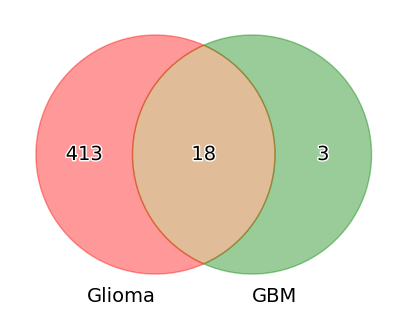

In [4]:
plot_venn2(del_glioma_set, del_gbm_set, 'Glioma', 'GBM')

# 2. Gain genes
> GBM에서 gain된 유전자\
> -> 많으면 안좋음\
> -> 적게 발현할 경우 오래 산다.
> -> low expression일 경우 오래 사는 유전자를 선택

In [5]:
# Load datasets
gain_glioma = pd.read_csv(f'{folderPath}survival_gain_tcga_glioma.csv', index_col=0)
gain_glioma = gain_glioma.loc[gain_glioma['long_survival'] == 'low', :]
gain_glioma = gain_glioma.loc[gain_glioma['p_value'] < 0.01, :]
gain_glioma_list = gain_glioma.index.tolist()
gain_glioma_set = set(gain_glioma_list)

gain_gbm = pd.read_csv(f'{folderPath}survival_gain_tcga_gbm.csv', index_col=0)
gain_gbm = gain_gbm.loc[gain_gbm['long_survival'] == 'low', :]
gain_gbm = gain_gbm.loc[gain_gbm['p_value'] < 0.05, :]
gain_gbm_list = gain_gbm.index.tolist()
gain_gbm_set = set(gain_gbm_list)

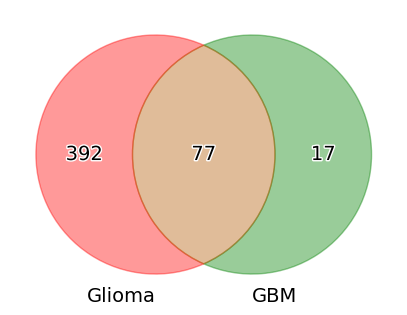

In [6]:
plot_venn2(gain_glioma_set, gain_gbm_set, 'Glioma', 'GBM')

# 3. Del이 없어지면서 gain을 얻은 유전자 (사실상 다른 기원?)
> GBM에서 gain을 얻었음\
> -> 많이 발현하면 안좋음\
> -> 적게 발현할 경우 오래 삶\
> -> Low expression에서 오래사는 유전자 선택

In [7]:
# Load datasets
md_pg_glioma = pd.read_csv(f'{folderPath}survival_mdel_pgain_tcga_glioma.csv', index_col=0)
md_pg_glioma = md_pg_glioma.loc[md_pg_glioma['long_survival'] == 'low', :]
md_pg_glioma = md_pg_glioma.loc[md_pg_glioma['p_value'] < 0.01, :]
md_pg_glioma_list = md_pg_glioma.index.tolist()
md_pg_glioma_set = set(md_pg_glioma_list)

md_pg_gbm = pd.read_csv(f'{folderPath}survival_mdel_pgain_tcga_gbm.csv', index_col=0)
md_pg_gbm = md_pg_gbm.loc[md_pg_gbm['long_survival'] == 'low', :]
md_pg_gbm = md_pg_gbm.loc[md_pg_gbm['p_value'] < 0.05, :]
md_pg_gbm_list = md_pg_gbm.index.tolist()
md_pg_gbm_set = set(md_pg_gbm_list)

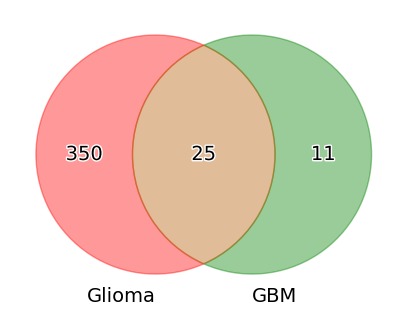

In [8]:
plot_venn2(md_pg_glioma_set, md_pg_gbm_set, 'Glioma', 'GBM')

---
# 4. Save the intersects

In [10]:
del_glioma_list
del_gbm_list

gain_glioma_list
gain_gbm_list

md_pg_glioma_list
md_pg_gbm_list

['B3GNT8',
 'BCL3',
 'C19orf33',
 'CAPN12',
 'CCDC114',
 'CCDC8',
 'CGB7',
 'FAM71E2',
 'FBXO17',
 'FXYD1',
 'IL4I1',
 'KCNN4',
 'KLK5',
 'KLK7',
 'LENG9',
 'LILRA5',
 'LILRB3',
 'MYBPC2',
 'NLRP12',
 'NLRP7',
 'NPHS1',
 'OSCAR',
 'PLAUR',
 'PLD3',
 'PLEKHF1',
 'PTPRH',
 'RCN3',
 'RRAS',
 'SCN1B',
 'SPTBN4',
 'SYT5',
 'TMC4',
 'TNNT1',
 'TULP2',
 'VASP',
 'VSIG10L']

In [16]:
# select gene not in del_glioma_list but in del_gbm_list
# del_result = [gene for gene in del_gbm_list if gene not in del_glioma_list]
# gain_result = [gene for gene in gain_gbm_list if gene not in gain_glioma_list]
# md_pg_result = [gene for gene in md_pg_gbm_list if gene not in md_pg_glioma_list]

# intersect
del_result = del_glioma_set.intersection(del_gbm_set)
gain_result = gain_glioma_set.intersection(gain_gbm_set)
md_pg_result = md_pg_glioma_set.intersection(md_pg_gbm_set)


In [21]:
# save result
del_result_df = pd.DataFrame(list(del_result), columns=['gene'])
del_result_df.to_csv(f'{resultPath}del_glioma_n_gbm.csv', index=False)

gain_result_df = pd.DataFrame(list(gain_result), columns=['gene'])
gain_result_df.to_csv(f'{resultPath}gain_glioma_n_gbm.csv', index=False)

md_pg_result_df = pd.DataFrame(list(md_pg_result), columns=['gene'])
md_pg_result_df.to_csv(f'{resultPath}md_pg_glioma_n_gbm.csv', index=False)